In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [122]:
df = pd.read_csv("HR_data.csv") 
df.head()

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [123]:
#Renaming the Columne
df = df.rename(columns={'Candidate.Ref':'Candidate_ref', 'DOJ.Extended':'DOJ_extended', 'Duration.to.accept.offer':'Accept_duration',
       'Notice.period':'Notice_period', 'Offered.band':'Offered_band', 'Pecent.hike.expected.in.CTC':'Percent_hike_expected',
       'Percent.hike.offered.in.CTC':'Percent_hike_offered', 'Percent.difference.CTC':'Percent_difference',
       'Joining.Bonus':'Joining_Bonus', 'Candidate.relocate.actual':'Relocated','Candidate.Source':'Source','Rex.in.Yrs':'Rex'})

In [124]:
df.head()

,SLNO,Candidate_ref,DOJ_extended,Accept_duration,Notice_period,Offered_band,Percent_hike_expected,Percent_hike_offered,Percent_difference,Joining_Bonus,Relocated,Gender,Source,Rex,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [125]:
df = df.drop(['SLNO'],axis=1)
df.head()

,Candidate_ref,DOJ_extended,Accept_duration,Notice_period,Offered_band,Percent_hike_expected,Percent_hike_offered,Percent_difference,Joining_Bonus,Relocated,Gender,Source,Rex,LOB,Location,Age,Status
0,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [126]:
df = df.drop(['Candidate_ref'],axis=1)
df.head()

,DOJ_extended,Accept_duration,Notice_period,Offered_band,Percent_hike_expected,Percent_hike_offered,Percent_difference,Joining_Bonus,Relocated,Gender,Source,Rex,LOB,Location,Age,Status
0,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [87]:
df.shape

(8995, 16)

In [88]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
df['DOJ_extended'] = labelEncoder_X.fit_transform(df['DOJ_extended'])
df['Offered_band'] = labelEncoder_X.fit_transform(df['Offered_band'])
df['Relocated'] = labelEncoder_X.fit_transform(df['Relocated'])
df['Gender'] = labelEncoder_X.fit_transform(df['Gender'])
df['Source'] = labelEncoder_X.fit_transform(df['Source'])
df['LOB'] = labelEncoder_X.fit_transform(df['LOB'])
df['Location'] = labelEncoder_X.fit_transform(df['Location'])
df['Joining_Bonus'] = labelEncoder_X.fit_transform(df['Joining_Bonus'])

In [89]:
#Attriton is dependent var
from sklearn.preprocessing import LabelEncoder
label_encoder_y=LabelEncoder()
df['Status']=label_encoder_y.fit_transform(df['Status'])

In [90]:
df.head()


,DOJ_extended,Accept_duration,Notice_period,Offered_band,Percent_hike_expected,Percent_hike_offered,Percent_difference,Joining_Bonus,Relocated,Gender,Source,Rex,LOB,Location,Age,Status
0,1,14,30,2,-20.79,13.16,42.86,0,0,0,0,7,4,8,34,0
1,0,18,30,2,50.00,320.00,180.00,0,0,1,2,8,7,2,34,0
2,0,3,45,2,42.84,42.84,0.00,0,0,1,0,4,7,8,27,0
3,0,26,30,2,42.84,42.84,0.00,0,0,1,2,4,7,8,34,0
4,1,1,120,2,42.59,42.59,0.00,0,1,1,2,6,7,8,34,0


In [91]:
corr_cols = df[['DOJ_extended', 'Accept_duration', 'Notice_period', 'Offered_band',
       'Percent_hike_expected', 'Percent_hike_offered',
       'Percent_difference', 'Joining_Bonus', 'Relocated',
       'Gender', 'Source', 'Rex', 'LOB', 'Location', 'Age',
       'Status' ]]

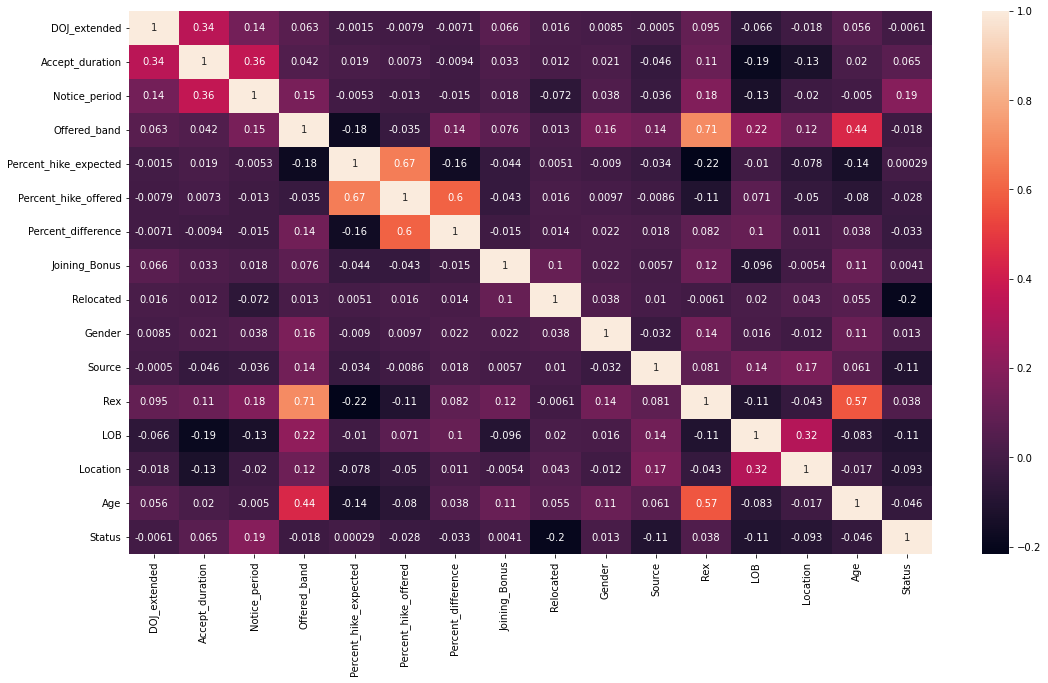

In [92]:
corr = corr_cols.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot = True)
plt.show()

In [93]:
#From this heatmap we can see that Rex and age has highest collinearity


#Seprating our dependent and independent variable for model training .

In [94]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X.head()

,DOJ_extended,Accept_duration,Notice_period,Offered_band,Percent_hike_expected,Percent_hike_offered,Percent_difference,Joining_Bonus,Relocated,Gender,Source,Rex,LOB,Location,Age
0,1,14,30,2,-20.79,13.16,42.86,0,0,0,0,7,4,8,34
1,0,18,30,2,50.00,320.00,180.00,0,0,1,2,8,7,2,34
2,0,3,45,2,42.84,42.84,0.00,0,0,1,0,4,7,8,27
3,0,26,30,2,42.84,42.84,0.00,0,0,1,2,4,7,8,34
4,1,1,120,2,42.59,42.59,0.00,0,1,1,2,6,7,8,34


In [95]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Status, dtype: int32

In [96]:
from sklearn.preprocessing import scale
X = scale(X)

In [97]:
#Spliting our dataset for train and test .

from sklearn.model_selection import train_test_split

In [98]:
#We are spliting out data into 8:2 ratio . 

#In trainig we are using our 80% data and in testing we are using our 20% data 

In [99]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20,random_state = 30)

In [100]:
#Importing Random Forest Classifier for our model

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
model = RandomForestClassifier()


In [103]:
#Training our model .

In [104]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [105]:
predict = model.predict(X_test)

In [106]:
model.score(X_test,y_test)

0.8260144524735964

In [107]:
df.columns


Index(['DOJ_extended', 'Accept_duration', 'Notice_period', 'Offered_band',
       'Percent_hike_expected', 'Percent_hike_offered', 'Percent_difference',
       'Joining_Bonus', 'Relocated', 'Gender', 'Source', 'Rex', 'LOB',
       'Location', 'Age', 'Status'],
      dtype='object')

In [108]:
df = ['']


In [109]:
#Predicting our test result .

In [110]:
print(predict)

[0 0 0 ... 0 0 0]


In [111]:
#Model Evaluation

from sklearn.metrics import accuracy_score, confusion_matrix

In [112]:
#Accuracy Score

accuracy_score(y_test,predict)

0.8260144524735964

In [113]:
 from sklearn.linear_model import LinearRegression

In [114]:
model1=LinearRegression()

In [115]:
model1.fit(X_train,y_train)

LinearRegression()

In [116]:
model1.score(X_test,y_test)

0.09785218022549358

In [117]:
from sklearn.ensemble import ExtraTreesClassifier

In [118]:
model2=ExtraTreesClassifier()

In [119]:
model2.fit(X_train,y_train)

ExtraTreesClassifier()

In [120]:
model2.score(X_test,y_test)

0.8215675375208449